In [3]:
import pandas as pd

In [4]:
import pandas as pd
import chardet

with open('spam.csv', 'rb') as f:
  rawdata = f.read()
  result = chardet.detect(rawdata)
  encoding = result['encoding']

df = pd.read_csv('spam.csv', encoding=encoding)


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4065,ham,Fyi I'm gonna call you sporadically starting a...,NaN,NaN,NaN
985,ham,Carlos says he'll be at mu in &lt;#&gt; minutes,NaN,NaN,NaN
5294,spam,XMAS iscoming & ur awarded either å£500 CD gif...,NaN,NaN,NaN
1244,ham,Now? I'm going out 4 dinner soon..,NaN,NaN,NaN
4822,ham,:-) :-),NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
#1.data cleaning 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last three columns
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True)

In [9]:
df.sample(5)

,v1,v2
4521,ham,DO U WANT 2 MEET UP 2MORRO
781,ham,"Hmmm ... I thought we said 2 hours slave, not ..."
3416,ham,But i haf enuff space got like 4 mb...
2068,ham,Its hard to believe things like this. All can ...
1139,ham,Message:some text missing* Sender:Name Missing...


In [10]:
#Rename the columns 
df.rename(columns = {"v1":"target","v2":"text"},inplace = True)

In [11]:
df.sample(5)

,target,text
5559,ham,if you aren't here in the next &lt;#&gt; hou...
4364,ham,Ujhhhhhhh computer shipped out with address to...
45,ham,No calls..messages..missed calls
4752,spam,Cashbin.co.uk (Get lots of cash this weekend!)...
298,ham,I cant pick the phone right now. Pls send a me...


In [12]:
#We convert the target column into numbers using labelencoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.sample(5)

,target,text
2790,1,U‰Ûªve Bin Awarded å£50 to Play 4 Instant Cash...
4182,0,"Sorry, I'll call later in meeting"
5119,0,Lol for real. She told my dad I have cancer
1858,0,"Sir, i am waiting for your call."
1903,1,Free entry in 2 a weekly comp for a chance to ...


In [15]:
#find missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#Check for duplicate values
df.duplicated().sum()

403

In [17]:
#Remove duplicates
df = df.drop_duplicates(keep = 'first')
df.shape

(5169, 2)

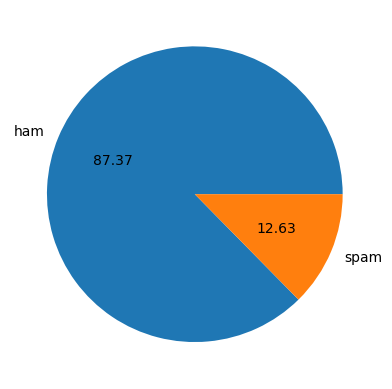

In [18]:
#2.EDA
df['target'].value_counts()
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

In [19]:
#Data is imbalance
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#Length of each message
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#No of words in each message
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
#No of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
#use describe function
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#Separate use of describe function for ham and spam 
df[df['target'] == 0] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['target'] == 1] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
#Plot histogram for both ham and spam 
import seaborn as sns

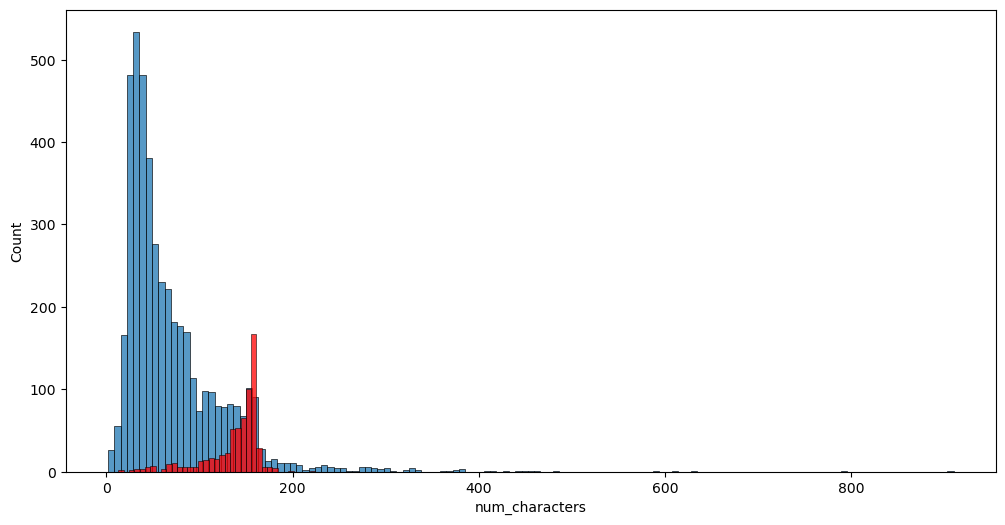

In [29]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')
plt.show()

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_52928\2918302317.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

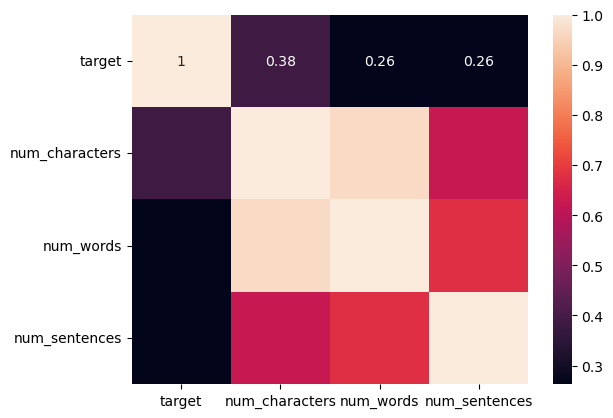

In [30]:
#Check correlation between the features
sns.heatmap(df.corr(),annot = True)

In [31]:
#3. Text Preprocessing
#Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuations
#Stemming

In [32]:
from nltk.corpus import stopwords
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [34]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
            
    

In [35]:
df['transformed_text'] = df['text'].apply(transform)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
df['transformed_text'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [38]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [39]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [40]:
#Word cloud of both ham and spam messages
from wordcloud import WordCloud 
wc = WordCloud(width = 500,height =500,min_font_size =10,background_color = 'white')

In [41]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

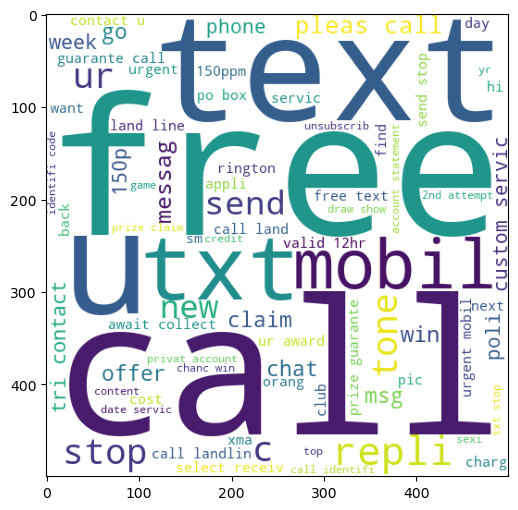

In [42]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [43]:
#For ham making a wordcloud 
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

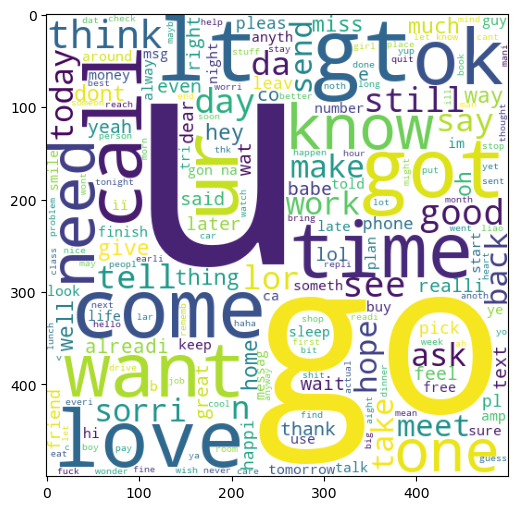

In [44]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [45]:
#Exact top 30 most used words in ham and spam
#For spam
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

In [48]:
from collections import Counter

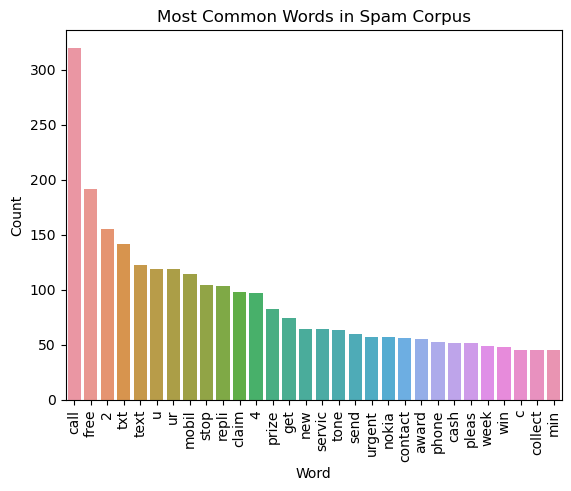

In [49]:
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30),columns = ['word','count'])
sns.barplot(x='word', y='count', data=word_counts)
plt.xticks(rotation= "vertical")  # Rotate x-axis labels for better readability
plt.title('Most Common Words in Spam Corpus')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [50]:
#Exact top 30 most used words in ham and spam
#For ham
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

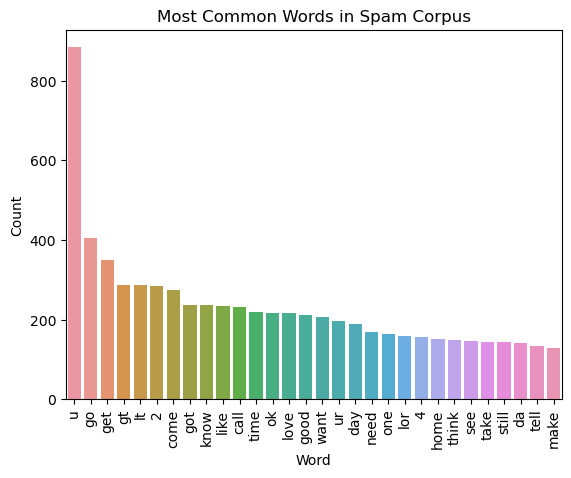

In [51]:
word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30),columns = ['word','count'])
sns.barplot(x='word', y='count', data=word_counts)
plt.xticks(rotation= "vertical")  # Rotate x-axis labels for better readability
plt.title('Most Common Words in Spam Corpus')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [52]:
#4 Model building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [107]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [108]:
X1 = cv.fit_transform(df['transformed_text']).toarray()

In [109]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [110]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [113]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [114]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [115]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [118]:
#Using Gaussian theoram
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

In [119]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [120]:
#Similarly for others theoram
#For MultinomialNB
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)

In [121]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [122]:
#For BernoulliNB
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)

In [123]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [70]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.1/124.9 MB 525.1 kB/s eta 0:03:58
   ---------------------------------------- 0.4/124.9 MB 2.9 MB/s eta 0:00:43
   ---------------------------------------- 0.8/124.9 MB 4.6 MB/s eta 0:00:28
   ---------------------------------------- 1.0/124.9 MB 4.4 MB/s eta 0:00:29
   ---------------------------------------- 1.1/124.9 MB 4.3 MB/s eta 0:00:30
   ---------------------------------------- 1.1/124.9 MB 4.3 MB/s eta 0:00:30
   ---------------------------------------- 1.1/124.9 MB 4.3 MB/s eta 0:00:30
   ---------------------------------------- 1.2/124.9 MB 3.0 MB/s eta 0:00:42
   ---------------------------------------- 1.2/124.9 MB 3.0 MB/s eta 0:00:42
   ---------------------------------------- 1.4/124.9 MB 2.8 MB/s e

In [126]:
#we use all classification theoram to find accuracy and precision of models.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [127]:
#Creating object of every model
svc = SVC(kernel = "sigmoid",gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear',penalty = "l1")
rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50,random_state = 2)
bc = BaggingClassifier(n_estimators = 50,random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [128]:
clfs = {
        'SVC':svc,
        'NB': mnb,
        'DT': dtc,
        'LR': lrc,
        'RF': rfc,
        'AdaBoost': abc,
        'Bgc' : bc,
        'ETC': etc,
        'GBDT': gbdt,
        'xgb': xgb
        }
        
        
    

In [129]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [130]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For Bgc
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [98]:
performance_df = pd.DataFrame({'Algorithium':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending = False)

In [131]:
temp_df = pd.DataFrame({'Algorithium':clfs.keys(),'Accuracy_3000':accuracy_scores,'Precision_3000':precision_scores}).sort_values('Precision_3000',ascending = False)

In [132]:
performance_df

,Algorithium,Accuracy,Precision
1,NB,0.959381,1.000000
4,RF,0.971954,1.000000
7,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
5,AdaBoost,0.961315,0.945455
9,xgb,0.972921,0.943548
3,LR,0.951644,0.940000
8,GBDT,0.952611,0.923810
6,Bgc,0.958414,0.862595
2,DT,0.935203,0.838095


In [133]:
temp_df

,Algorithium,Accuracy_3000,Precision_3000
1,NB,0.970986,1.000000
4,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
3,LR,0.958414,0.970297
5,AdaBoost,0.960348,0.929204
9,xgb,0.967118,0.926230
8,GBDT,0.946809,0.919192
6,Bgc,0.958414,0.868217
2,DT,0.929400,0.828283


In [102]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithium")

In [103]:
performance_df1

,Algorithium,variable,value
0,NB,Accuracy,0.959381
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.972921
3,SVC,Accuracy,0.972921
4,AdaBoost,Accuracy,0.961315
5,xgb,Accuracy,0.972921
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,Bgc,Accuracy,0.958414
9,DT,Accuracy,0.935203


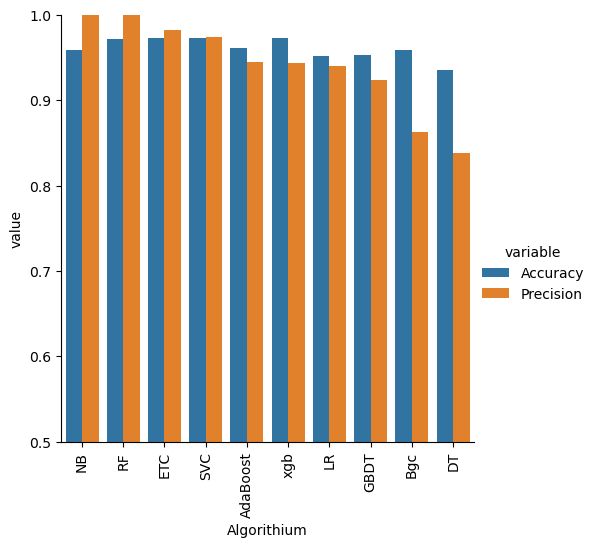

In [106]:
#Plot a graph of accuracy and precision
sns.catplot(x ="Algorithium",y = "value",hue ="variable",data = performance_df1,kind = "bar",height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [134]:
#Model improve 
#Change the max_feature parameter of tfidf
performance_df.merge(temp_df,on = "Algorithium")

,Algorithium,Accuracy,Precision,Accuracy_3000,Precision_3000
0,NB,0.959381,1.000000,0.970986,1.000000
1,RF,0.971954,1.000000,0.975822,0.982906
2,ETC,0.972921,0.982456,0.974855,0.974576
3,SVC,0.972921,0.974138,0.975822,0.974790
4,AdaBoost,0.961315,0.945455,0.960348,0.929204
5,xgb,0.972921,0.943548,0.967118,0.926230
6,LR,0.951644,0.940000,0.958414,0.970297
7,GBDT,0.952611,0.923810,0.946809,0.919192
8,Bgc,0.958414,0.862595,0.958414,0.868217
9,DT,0.935203,0.838095,0.929400,0.828283


In [136]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))